In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
def seperate_label(train, test):
    test_label = test["median_house_value"]
    train_label = train["median_house_value"]
    train.drop(["median_house_value"], axis=1, inplace=True)
    test.drop(["median_house_value"], axis=1, inplace=True)
    return train, test, train_label, test_label

In [4]:
def mse(model, x, y):
    temp = mean_squared_error(model.predict(x), y)
    return np.sqrt(temp)

In [5]:
def cvs(model, x, y, cv=5):
    score = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=cv)
    score = np.sqrt(-score)
    #print("\nCross Validation Score "+str(score))
    #print("Variance "+str(score.var()))
    return score.mean()

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>],
       [<AxesSubplot:title={'center':'class_family'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

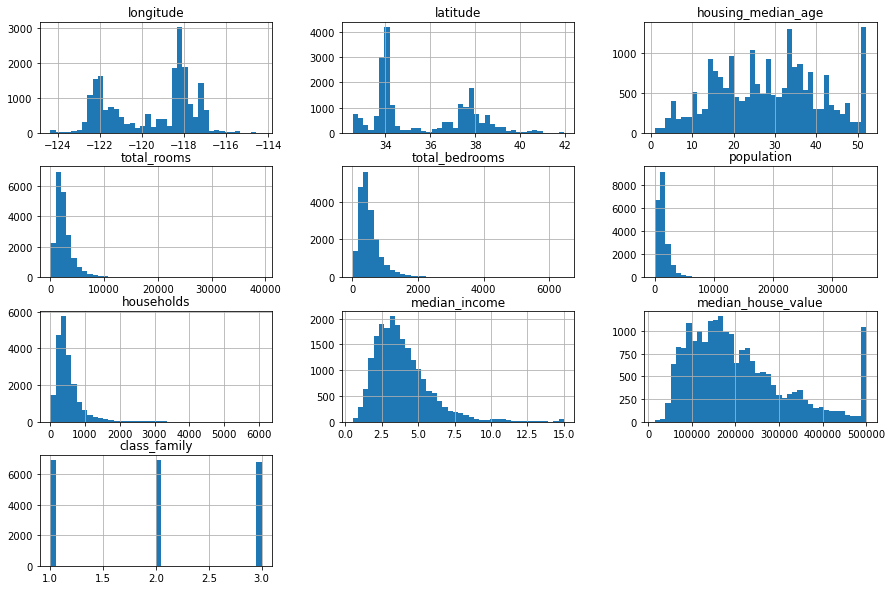

In [6]:
path = r"housing.csv"
df = pd.read_csv(path) #Load the csv file.
df.hist(bins=40, figsize=(15, 10))

In [7]:
imputer = SimpleImputer(strategy="median")
temp_data = df.drop("ocean_proximity", axis=1)
imputer.fit(temp_data)
transformed_data = imputer.transform(temp_data)
housing_new = pd.DataFrame(transformed_data, columns=temp_data.columns)
housing_new["ocean_proximity"] = df["ocean_proximity"]
housing_new.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,class_family,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2.0,NEAR BAY


In [8]:
housing_new["population_per_house"] = housing_new["population"]/housing_new["households"]
housing_new["rooms_per_house"] = housing_new["total_rooms"]/housing_new["households"]
housing_new.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,class_family,ocean_proximity,population_per_house,rooms_per_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1.0,NEAR BAY,2.555556,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2.0,NEAR BAY,2.109842,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3.0,NEAR BAY,2.802260,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1.0,NEAR BAY,2.547945,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2.0,NEAR BAY,2.181467,6.281853


In [9]:

encoder = LabelBinarizer()
ocean_encoded = encoder.fit_transform(housing_new["ocean_proximity"])
ocean_encoded = pd.DataFrame(ocean_encoded)
housing_new.drop(["ocean_proximity"], axis=1, inplace=True)
housing_new = housing_new.join(ocean_encoded)
housing_new.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,class_family,population_per_house,rooms_per_house,0,1,2,3,4
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1.0,2.555556,6.984127,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2.0,2.109842,6.238137,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3.0,2.802260,8.288136,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1.0,2.547945,5.817352,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2.0,2.181467,6.281853,0,0,0,1,0


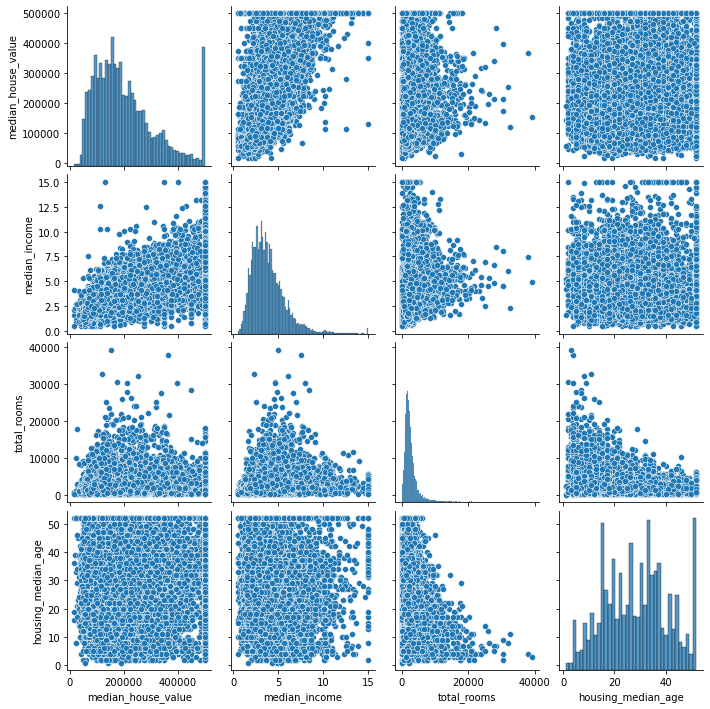

In [10]:

sns.pairplot(housing_new[['median_house_value','median_income','total_rooms','housing_median_age']])
housing_new["income_cat"] = np.ceil(housing_new["median_income"]/2)
housing_new["income_cat"].where(housing_new["income_cat"]<5, 5, inplace=True)

In [11]:

housing_corr = housing_new.corr()
correlation = housing_corr["median_house_value"].sort_values(ascending=False)

In [12]:

temp = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_ind, test_ind in temp.split(housing_new, housing_new["income_cat"]):
    housing_train = housing_new.loc[train_ind]
    housing_test = housing_new.loc[test_ind]
    
for cat in (housing_train, housing_test):
    cat.drop(["income_cat"], axis=1, inplace=True)


In [13]:
housing_train, housing_test, train_label, test_label = seperate_label(housing_train, housing_test)


In [14]:
housing_train.columns = housing_train.columns.astype(str) 
housing_test.columns = housing_test.columns.astype(str) 

In [15]:
scaler = StandardScaler()
x_train=scaler.fit_transform(housing_train)
x_test=scaler.fit_transform(housing_test)

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x_train, train_label)

model.score(x_test, test_label)

/home/tanisha/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.04796511627906977

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [18]:
x= df['median_income']
X= scaler.fit_transform(pd.DataFrame(x))


In [19]:
model.predict(df.class_family[0:5])

ValueError: Expected 2D array, got 1D array instead:
array=[1 2 3 1 2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [20]:
#confusion matrix
y_predicted = model.predict(housing_test)

/home/tanisha/.local/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_label, y_predicted)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
import seaborn as sn
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
